CODE BLOCK: 1

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms

In [2]:
from utils import get_train_test_transforms, get_train_test_loader, train, test
from model import Net

In [3]:
# CUDA?
cuda = torch.cuda.is_available()
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
print("CUDA Available?", cuda)

CUDA Available? True


In [4]:
train_transforms, test_transforms = get_train_test_transforms()

train_data = datasets.MNIST('../data', train=True, download=True, transform=train_transforms)
test_data = datasets.MNIST('../data', train=False, download=True, transform=test_transforms)

train_loader,test_loader=get_train_test_loader(train_data, test_data)

100%|██████████| 9912422/9912422 [00:00<00:00, 96896139.94it/s]


Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 41541733.14it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 25501920.77it/s]


Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 21599238.97it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw



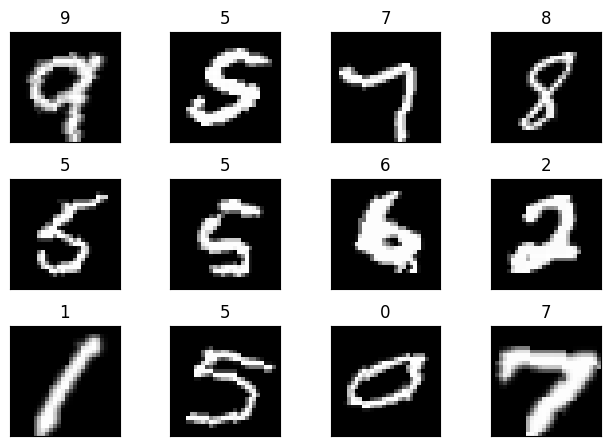

In [5]:
import matplotlib.pyplot as plt

batch_data, batch_label = next(iter(train_loader)) 

fig = plt.figure()

for i in range(12):
  plt.subplot(3,4,i+1)
  plt.tight_layout()
  plt.imshow(batch_data[i].squeeze(0), cmap='gray')
  plt.title(batch_label[i].item())
  plt.xticks([])
  plt.yticks([])

In [6]:
# Data to plot accuracy and loss graphs
train_losses = []
test_losses = []
train_acc = []
test_acc = []

test_incorrect_pred = {'images': [], 'ground_truths': [], 'predicted_vals': []}

In [8]:
model = Net().to(device)
optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.9)
scheduler = optim.lr_scheduler.StepLR(optimizer, step_size=15, gamma=0.1, verbose=True)
# New Line
criterion = nn.CrossEntropyLoss()
num_epochs = 20

for epoch in range(1, num_epochs+1):
  print(f'Epoch {epoch}')
  train_acc_ep, train_losses_ep=train(model, device, train_loader, optimizer, criterion)
  test_acc_ep, test_losses_ep=test(model, device, test_loader, criterion)
  scheduler.step()

  train_losses.append(train_losses_ep),test_losses.append(test_losses_ep),train_acc.append(train_acc_ep),test_acc.append(test_acc_ep)
  

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 1


Train: Loss=0.2184 Batch_id=468 Accuracy=85.93: 100%|██████████| 469/469 [00:25<00:00, 18.33it/s]


Test set: Average loss: 0.0004, Accuracy: 9826/10000 (98.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 2


Train: Loss=0.1408 Batch_id=468 Accuracy=97.36: 100%|██████████| 469/469 [00:26<00:00, 17.94it/s]


Test set: Average loss: 0.0003, Accuracy: 9877/10000 (98.77%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 3


Train: Loss=0.0700 Batch_id=468 Accuracy=98.02: 100%|██████████| 469/469 [00:26<00:00, 18.00it/s]


Test set: Average loss: 0.0002, Accuracy: 9891/10000 (98.91%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 4


Train: Loss=0.0446 Batch_id=468 Accuracy=98.42: 100%|██████████| 469/469 [00:25<00:00, 18.09it/s]


Test set: Average loss: 0.0002, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 5


Train: Loss=0.0250 Batch_id=468 Accuracy=98.63: 100%|██████████| 469/469 [00:25<00:00, 18.08it/s]


Test set: Average loss: 0.0002, Accuracy: 9914/10000 (99.14%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 6


Train: Loss=0.0942 Batch_id=468 Accuracy=98.76: 100%|██████████| 469/469 [00:25<00:00, 18.05it/s]


Test set: Average loss: 0.0002, Accuracy: 9907/10000 (99.07%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 7


Train: Loss=0.0231 Batch_id=468 Accuracy=98.93: 100%|██████████| 469/469 [00:25<00:00, 18.04it/s]


Test set: Average loss: 0.0002, Accuracy: 9923/10000 (99.23%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 8


Train: Loss=0.0055 Batch_id=468 Accuracy=99.06: 100%|██████████| 469/469 [00:25<00:00, 18.06it/s]


Test set: Average loss: 0.0002, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 9


Train: Loss=0.0026 Batch_id=468 Accuracy=99.11: 100%|██████████| 469/469 [00:26<00:00, 17.95it/s]


Test set: Average loss: 0.0002, Accuracy: 9915/10000 (99.15%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 10


Train: Loss=0.0228 Batch_id=468 Accuracy=99.20: 100%|██████████| 469/469 [00:26<00:00, 17.76it/s]


Test set: Average loss: 0.0001, Accuracy: 9938/10000 (99.38%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 11


Train: Loss=0.0031 Batch_id=468 Accuracy=99.19: 100%|██████████| 469/469 [00:26<00:00, 17.94it/s]


Test set: Average loss: 0.0002, Accuracy: 9925/10000 (99.25%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 12


Train: Loss=0.0067 Batch_id=468 Accuracy=99.22: 100%|██████████| 469/469 [00:26<00:00, 17.99it/s]


Test set: Average loss: 0.0001, Accuracy: 9932/10000 (99.32%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 13


Train: Loss=0.0537 Batch_id=468 Accuracy=99.27: 100%|██████████| 469/469 [00:26<00:00, 17.49it/s]


Test set: Average loss: 0.0002, Accuracy: 9917/10000 (99.17%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 14


Train: Loss=0.0374 Batch_id=468 Accuracy=99.33: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]


Test set: Average loss: 0.0002, Accuracy: 9926/10000 (99.26%)

Adjusting learning rate of group 0 to 1.0000e-02.
Epoch 15


Train: Loss=0.0216 Batch_id=468 Accuracy=99.39: 100%|██████████| 469/469 [00:26<00:00, 17.94it/s]


Test set: Average loss: 0.0001, Accuracy: 9941/10000 (99.41%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 16


Train: Loss=0.0043 Batch_id=468 Accuracy=99.60: 100%|██████████| 469/469 [00:26<00:00, 17.81it/s]


Test set: Average loss: 0.0001, Accuracy: 9948/10000 (99.48%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 17


Train: Loss=0.0087 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:26<00:00, 17.76it/s]


Test set: Average loss: 0.0001, Accuracy: 9945/10000 (99.45%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 18


Train: Loss=0.0008 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:26<00:00, 17.91it/s]


Test set: Average loss: 0.0001, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 19


Train: Loss=0.0008 Batch_id=468 Accuracy=99.67: 100%|██████████| 469/469 [00:26<00:00, 17.83it/s]


Test set: Average loss: 0.0001, Accuracy: 9946/10000 (99.46%)

Adjusting learning rate of group 0 to 1.0000e-03.
Epoch 20


Train: Loss=0.0007 Batch_id=468 Accuracy=99.68: 100%|██████████| 469/469 [00:26<00:00, 18.03it/s]


Test set: Average loss: 0.0001, Accuracy: 9949/10000 (99.49%)

Adjusting learning rate of group 0 to 1.0000e-03.


Text(0.5, 1.0, 'Test Accuracy')

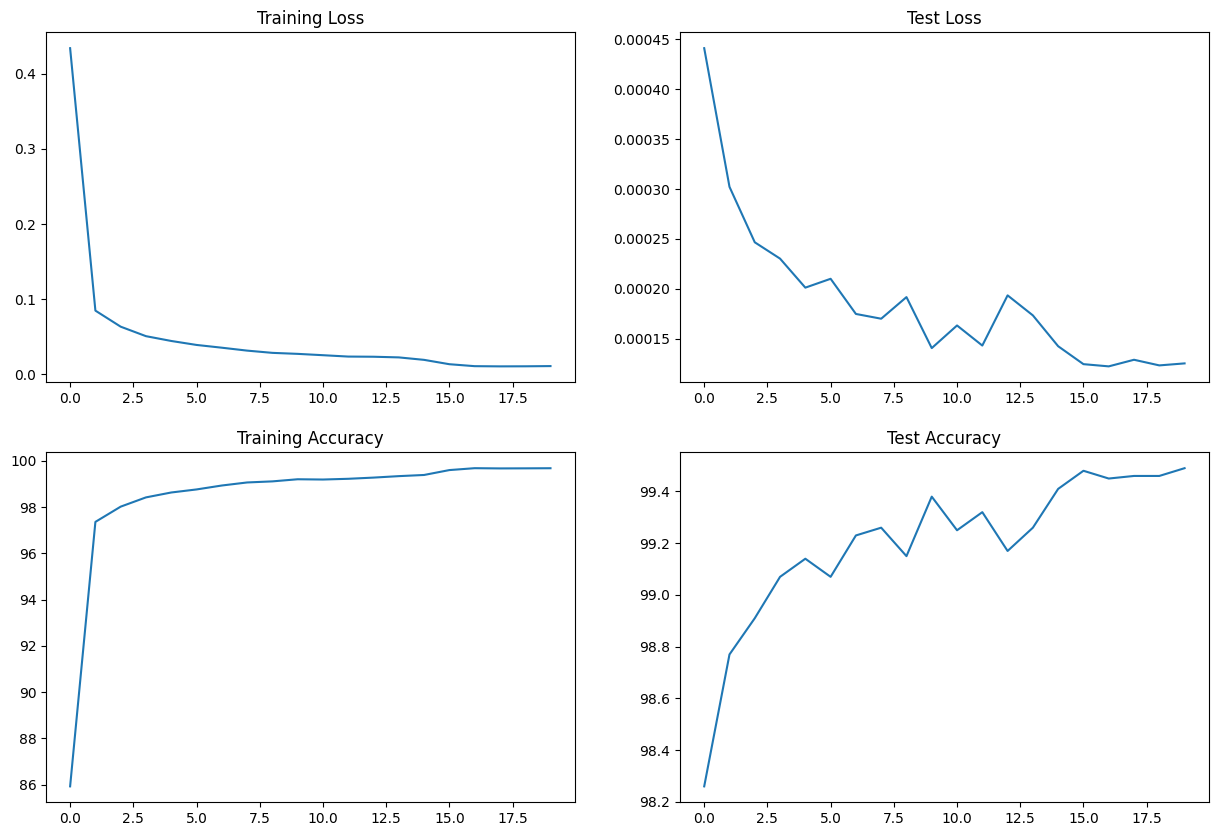

In [9]:
fig, axs = plt.subplots(2,2,figsize=(15,10))
axs[0, 0].plot(train_losses)
axs[0, 0].set_title("Training Loss")
axs[1, 0].plot(train_acc)
axs[1, 0].set_title("Training Accuracy")
axs[0, 1].plot(test_losses)
axs[0, 1].set_title("Test Loss")
axs[1, 1].plot(test_acc)
axs[1, 1].set_title("Test Accuracy")

In [ ]:
!pip install torchsummary
from torchsummary import summary
use_cuda = torch.cuda.is_available()
device = torch.device("cuda" if use_cuda else "cpu")
model = Net().to(device)
summary(model, input_size=(1, 28, 28))

Looking in indexes: https://pypi.org/simple, https://pypi.ngc.nvidia.com
----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 32, 26, 26]             320
            Conv2d-2           [-1, 64, 24, 24]          18,496
            Conv2d-3          [-1, 128, 10, 10]          73,856
            Conv2d-4            [-1, 256, 8, 8]         295,168
            Linear-5                   [-1, 50]         204,850
            Linear-6                   [-1, 10]             510
Total params: 593,200
Trainable params: 593,200
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.00
Forward/backward pass size (MB): 0.67
Params size (MB): 2.26
Estimated Total Size (MB): 2.94
----------------------------------------------------------------
